In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/sample_submission.csv
/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/Urun Ozellikleri.xlsx
/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/train.csv
/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/test.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/train.csv')
test = pd.read_csv('/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/test.csv')

In [4]:
train

,MUSTERI_ID,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,...,0,0,0,0,0,0,0,0,0,9
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,...,0,0,0,0,0,0,0,0,0,11
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,...,0,1,0,0,0,0,0,0,0,66
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,UA,MAYIS,2,648,Diğer,106,1,34,NaN,...,0,0,0,0,0,0,0,0,0,111
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,UA,EYLUL,2,487,İşçi,103,1,77,NaN,...,0,0,0,0,0,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852714,4a245f1a49af39319faa41668d6ee425fb71c7a75e8b22...,UA,MAYIS,1,551,İşçi,105,1,35,NaN,...,0,0,0,0,0,0,0,0,0,7
852715,2087a8e5f1f98d143011df1cccaa0331e3427b1a1e642e...,UA,HAZIRAN,2,466,Ev Hanımı,104,1,33,NaN,...,0,0,0,0,0,0,0,0,0,52
852716,8d4dccb1bd4763e909476935805d99b84e7f2098b646b7...,UA,MAYIS,1,139,İşçi,106,1,28,NaN,...,0,0,0,0,0,0,0,0,0,5
852717,e33a48c42db1da438d54da64cf59ef4acae4583bd4effc...,UA,MAYIS,2,303,NaN,106,1,20,NaN,...,0,0,0,0,0,0,0,0,0,72


In [3]:
# Meslek ve Label'ı bir contingency table'a dönüştürme
ua_data = train[train['LABEL'] != 'UA']

contingency_table = pd.crosstab(ua_data['PP_MESLEK'], ua_data['LABEL'])

# Her meslek için Label tercihini hesaplama
meslek_label_tercihi = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# En çok tercih edilen Label'ı bulma
en_cok_tercih_edilen_label = meslek_label_tercihi.idxmax(axis=1)

# Sonuçları bir tabloda gösterme
sonuc = pd.DataFrame({
    'Meslek': en_cok_tercih_edilen_label.index,
    'En Çok Tercih Edilen Label': en_cok_tercih_edilen_label.values
})

In [5]:
en_cok_tercih_edilen_label

PP_MESLEK
Akademisyen               HU14
Amiral                    HU14
Analist                   HU14
Antrenör                  HU07
Astsubay                  HU06
                          ... 
İşsiz                     HU14
İşyeri Sahibi/Ortağı      HU14
İşçi                      HU14
Şoför                     HU14
Şoför/Makine Operatörü    HU14
Length: 109, dtype: object

In [6]:
sonuc['En Çok Tercih Edilen Label'].unique()
sonuc

,Meslek,En Çok Tercih Edilen Label
0,Akademisyen,HU14
1,Amiral,HU14
2,Analist,HU14
3,Antrenör,HU07
4,Astsubay,HU06
...,...,...
104,İşsiz,HU14
105,İşyeri Sahibi/Ortağı,HU14
106,İşçi,HU14
107,Şoför,HU14


In [7]:
train['SORU_GELIR_CVP'].nunique()

4128

In [8]:
datax = train[train['SORU_GELIR_CVP'].isnull()]
datax

,MUSTERI_ID,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,...,0,0,0,0,0,0,0,0,0,9
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,...,0,1,0,0,0,0,0,0,0,66
5,89c8f825774b2cd43583a1cac8d3fcb06c94bedd47464a...,UA,MAYIS,1,468,Serbest Meslek,102,1,34,NaN,...,0,0,0,0,0,0,0,0,0,72
6,39142bd276bb368ca3834e6abc5f680bda1a4b94da75f2...,UA,HAZIRAN,2,223,Öğrenci,105,1,48,NaN,...,0,0,0,0,0,0,0,0,0,3
8,2e61f5f693bb8361b142d79e365abd71525acff40b8261...,UA,HAZIRAN,1,436,İşçi,105,1,2,NaN,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852700,cd49cb732aa0b311361ec9644a452b3673d5be8dc9ca19...,UA,EKIM,2,526,Ev Hanımı,105,1,35,NaN,...,0,0,0,0,0,0,0,0,0,55
852702,8cc9bd8944c728fcac98a11a45e1eda9e6aac9c7fd5695...,UA,MAYIS,1,592,Diğer,105,1,35,Dengeli,...,0,0,0,0,0,0,0,0,0,59
852707,e92098543d5bda159cc7f02295350406404e25a98e12fa...,UA,EYLUL,2,129,Öğrenci,106,1,33,NaN,...,0,0,0,0,0,0,0,0,0,1
852709,a3ba51ef14f964225d5b4d67f5f7ed67cfa56dc1e309b9...,UA,EYLUL,1,515,İşçi,104,1,59,NaN,...,0,0,0,0,0,0,0,0,0,114


In [9]:
datax['LABEL'].unique()

array(['UA', 'HU19', 'HU14', 'HU06', 'HU11', 'HU07', 'HU15', 'HU12'],
      dtype=object)

In [10]:
# HU06 için yaş ortalaması
hu06_rows = train[train['LABEL'] == 'HU06']
yas_ortalamasi = hu06_rows['PP_YAS'].mean()
print("HU06 için yaş ortalaması:", yas_ortalamasi / 12)

# HU07 için yaş ortalaması
hu07_rows = train[train['LABEL'] == 'HU07']
yas_ortalamasi2 = hu07_rows['PP_YAS'].mean()
print("HU07 için yaş ortalaması:", yas_ortalamasi2 / 12)

# HU11 için yaş ortalaması
hu11_rows = train[train['LABEL'] == 'HU11']
yas_ortalamasi3 = hu11_rows['PP_YAS'].mean()
print("HU11 için yaş ortalaması:", yas_ortalamasi3 / 12)

# HU12 için yaş ortalaması
hu12_rows = train[train['LABEL'] == 'HU12']
yas_ortalamasi4 = hu12_rows['PP_YAS'].mean()
print("HU12 için yaş ortalaması:", yas_ortalamasi4 / 12)

# HU14 için yaş ortalaması
hu14_rows = train[train['LABEL'] == 'HU14']
yas_ortalamasi5 = hu14_rows['PP_YAS'].mean()
print("HU14 için yaş ortalaması:", yas_ortalamasi5 / 12)

# HU15 için yaş ortalaması
hu15_rows = train[train['LABEL'] == 'HU15']
yas_ortalamasi6 = hu15_rows['PP_YAS'].mean()
print("HU15 için yaş ortalaması:", yas_ortalamasi6 / 12)

# HU19 için yaş ortalaması
hu19_rows = train[train['LABEL'] == 'HU19']
yas_ortalamasi7 = hu19_rows['PP_YAS'].mean()
print("HU19 için yaş ortalaması:", yas_ortalamasi7 / 12)


HU06 için yaş ortalaması: 36.57370988042794
HU07 için yaş ortalaması: 36.882466022889844
HU11 için yaş ortalaması: 39.67558845861807
HU12 için yaş ortalaması: 42.68910256410256
HU14 için yaş ortalaması: 35.70950344058025
HU15 için yaş ortalaması: 39.831927710843374
HU19 için yaş ortalaması: 37.02064119455424


In [11]:
yas_mean = train['PP_YAS'].mean()
yas_median = train['PP_YAS'].median()
print("Genel yaş ortalaması:", yas_mean / 12)
yas_median / 12

Genel yaş ortalaması: 36.73109293135644


39.166666666666664

In [12]:
label_counts = train['LABEL'].value_counts()
print("Label değerlerinin sayısı:")
print(label_counts)


Label değerlerinin sayısı:
LABEL
UA      832770
HU14     10754
HU07      3728
HU06      3178
HU19       759
HU12       676
HU11       439
HU15       415
Name: count, dtype: int64


In [13]:
# Hedef etiketlerin listesi
hedef_etiketler = ['HU06', 'HU07', 'HU11', 'HU12', 'HU14', 'HU15', 'HU19', 'UA']

for etiket in hedef_etiketler:
    etiket_rows = train[train['LABEL'] == etiket]
    etiket_before_counts = {}
    
    for col in train.columns:
        if col.startswith('HU') or col.startswith('UA') and col != 'LABEL':
            etiket_before_counts[col] = etiket_rows[col].sum()
    
    print(f"{etiket} etiketinden önce HU1 - HU19 sütunlarında 1 değerinin bulunduğu sütun sayıları:")
    for col, count in etiket_before_counts.items():
        print(col, ":", count)


HU06 etiketinden önce HU1 - HU19 sütunlarında 1 değerinin bulunduğu sütun sayıları:
HU01 : 1
HU02 : 0
HU03 : 5
HU04 : 140
HU05 : 240
HU06 : 91
HU07 : 37
HU10 : 30
HU11 : 62
HU12 : 13
HU13 : 1
HU14 : 332
HU15 : 5
HU16 : 6
HU17 : 281
HU18 : 301
HU19 : 68
HU07 etiketinden önce HU1 - HU19 sütunlarında 1 değerinin bulunduğu sütun sayıları:
HU01 : 1
HU02 : 1
HU03 : 1
HU04 : 13
HU05 : 130
HU06 : 120
HU07 : 0
HU10 : 29
HU11 : 9
HU12 : 1
HU13 : 0
HU14 : 341
HU15 : 0
HU16 : 4
HU17 : 33
HU18 : 183
HU19 : 40
HU11 etiketinden önce HU1 - HU19 sütunlarında 1 değerinin bulunduğu sütun sayıları:
HU01 : 1
HU02 : 0
HU03 : 0
HU04 : 9
HU05 : 32
HU06 : 105
HU07 : 13
HU10 : 8
HU11 : 6
HU12 : 7
HU13 : 0
HU14 : 110
HU15 : 6
HU16 : 1
HU17 : 106
HU18 : 31
HU19 : 38
HU12 etiketinden önce HU1 - HU19 sütunlarında 1 değerinin bulunduğu sütun sayıları:
HU01 : 0
HU02 : 0
HU03 : 0
HU04 : 9
HU05 : 4
HU06 : 48
HU07 : 11
HU10 : 25
HU11 : 14
HU12 : 52
HU13 : 5
HU14 : 123
HU15 : 3
HU16 : 0
HU17 : 224
HU18 : 6
HU19 : 47
HU14

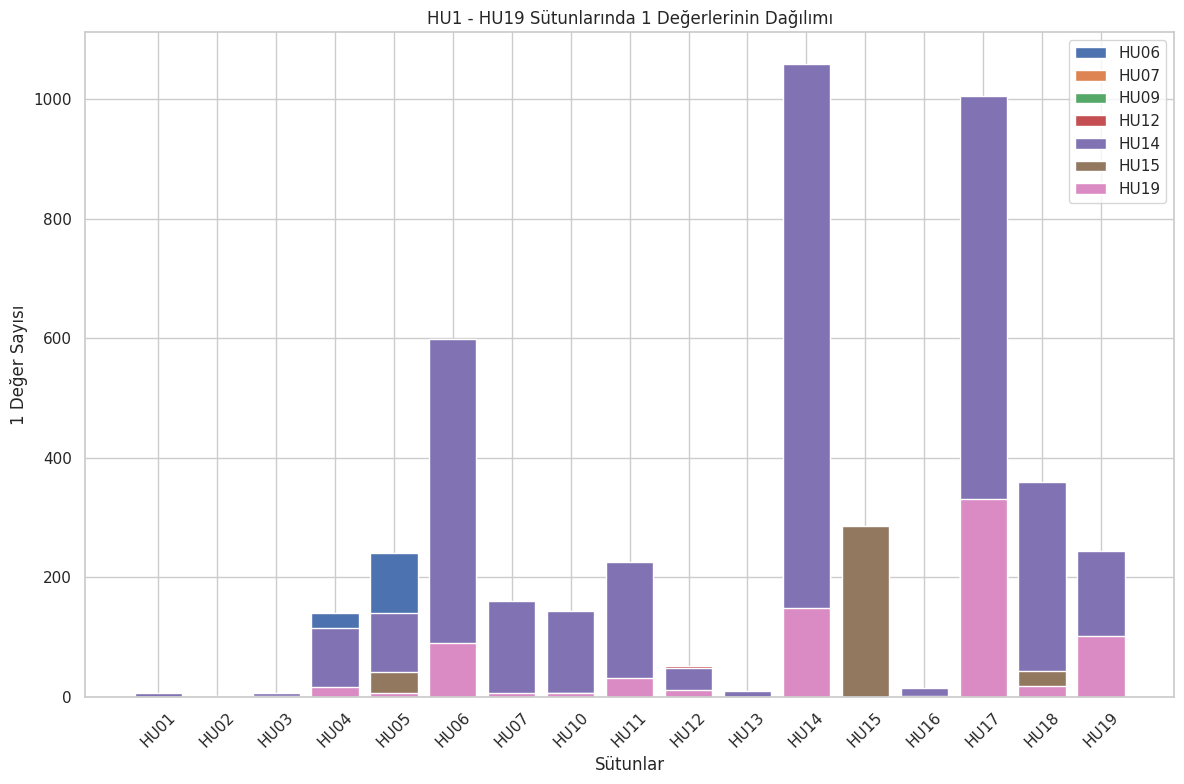

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hedef etiketlerin listesi
hedef_etiketler = ['HU06', 'HU07', 'HU09', 'HU12', 'HU14', 'HU15', 'HU19']

# Grafik boyutları ve stil ayarları
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Her bir etiket için çubuk grafik oluşturma
for etiket in hedef_etiketler:
    etiket_rows = train[train['LABEL'] == etiket]
    etiket_before_counts = {}
    
    for col in train.columns:
        if col.startswith('HU') and col != 'LABEL':
            etiket_before_counts[col] = etiket_rows[col].sum()
    
    # Verileri çubuk grafik olarak çizme
    plt.bar(etiket_before_counts.keys(), etiket_before_counts.values(), label=etiket)

# Grafik başlığı ve eksen etiketleri
plt.title('HU1 - HU19 Sütunlarında 1 Değerlerinin Dağılımı')
plt.xlabel('Sütunlar')
plt.ylabel('1 Değer Sayısı')

# Sütunlarda etiketleri döndürme
plt.xticks(rotation=45)

# Grafikteki etiketleri gösterme
plt.legend()

# Grafik gösterme
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Verileri bir sözlükte toplama
veriler = {
    'Etiket': ['HU06', 'HU07', 'HU09', 'HU12', 'HU14', 'HU15', 'HU19', 'UA'],
    'HU01': [1, 1, 0, 0, 7, 0, 0, 249],
    'HU02': [0, 1, 0, 0, 0, 1, 0, 14],
    'HU03': [5, 1, 0, 0, 6, 1, 0, 632],
    'HU04': [140, 13, 0, 9, 116, 5, 17, 9026],
    'HU05': [240, 130, 0, 4, 140, 42, 6, 7126],
    'HU06': [91, 120, 0, 48, 599, 30, 90, 12780],
    'HU07': [37, 0, 0, 11, 161, 0, 6, 5422],
    'HU10': [30, 29, 0, 25, 143, 6, 7, 4201],
    'HU11': [62, 9, 0, 14, 225, 6, 32, 1654],
    'HU12': [13, 1, 0, 52, 48, 0, 12, 677],
    'HU13': [1, 0, 0, 5, 9, 0, 0, 70],
    'HU14': [332, 341, 0, 123, 1059, 40, 148, 15220],
    'HU15': [5, 0, 0, 3, 18, 286, 0, 339],
    'HU16': [6, 4, 0, 0, 15, 0, 2, 315],
    'HU17': [281, 33, 0, 224, 1005, 16, 331, 8723],
    'HU18': [301, 183, 0, 6, 359, 43, 19, 16047],
    'HU19': [68, 40, 0, 47, 244, 2, 102, 5305]
}

# DataFrame oluşturma
df = pd.DataFrame(veriler)

# Etiket sütununu indeks yapma
df.set_index('Etiket', inplace=True)

# DataFrame'i ekrana yazdırma
print(df)


        HU01  HU02  HU03  HU04  HU05   HU06  HU07  HU10  HU11  HU12  HU13  \
Etiket                                                                      
HU06       1     0     5   140   240     91    37    30    62    13     1   
HU07       1     1     1    13   130    120     0    29     9     1     0   
HU09       0     0     0     0     0      0     0     0     0     0     0   
HU12       0     0     0     9     4     48    11    25    14    52     5   
HU14       7     0     6   116   140    599   161   143   225    48     9   
HU15       0     1     1     5    42     30     0     6     6     0     0   
HU19       0     0     0    17     6     90     6     7    32    12     0   
UA       249    14   632  9026  7126  12780  5422  4201  1654   677    70   

         HU14  HU15  HU16  HU17   HU18  HU19  
Etiket                                        
HU06      332     5     6   281    301    68  
HU07      341     0     4    33    183    40  
HU09        0     0     0     0      0   

In [16]:
# Train veri seti sütun bilgileri
print("Train Veri Seti:")
print(train.info())

# Test veri seti sütun bilgileri
print("\nTest Veri Seti:")
print(test.info())


Train Veri Seti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852719 entries, 0 to 852718
Data columns (total 97 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MUSTERI_ID                  852719 non-null  object 
 1   LABEL                       852719 non-null  object 
 2   FLAG                        852719 non-null  object 
 3   PP_CINSIYET                 852719 non-null  int64  
 4   PP_YAS                      852719 non-null  int64  
 5   PP_MESLEK                   764099 non-null  object 
 6   PP_MUSTERI_SEGMENTI         852719 non-null  int64  
 7   PP_UYRUK                    852719 non-null  int64  
 8   IL                          852719 non-null  int64  
 9   SORU_YATIRIM_KARAKTERI_CVP  132698 non-null  object 
 10  SORU_YATIRIM_KARAKTERI_RG   132698 non-null  float64
 11  SORU_MEDENI_HAL_CVP         850939 non-null  object 
 12  SORU_MEDENI_HAL_RG          850939 non-null  float64
 1

In [17]:
segment_counts = train.groupby(['LABEL', 'PP_MUSTERI_SEGMENTI']).size().unstack(fill_value=0)
print(segment_counts)


PP_MUSTERI_SEGMENTI  101     102    103    104     105     106
LABEL                                                         
HU06                  61    1195    451    778     585     108
HU07                   2     620    425    532    1874     275
HU11                  19     236    159     13      11       1
HU12                   1     100     93    107     224     151
HU14                  16    1732   1465   1707    4946     888
HU15                   0     146     78     95      85      11
HU19                   1     174    149    188     196      51
UA                   712  102893  85825  85756  189006  368578


In [18]:
segment_counts = train.groupby(['LABEL', 'PP_UYRUK']).size().unstack(fill_value=0)
print(segment_counts)
segment_counts2 = train['PP_UYRUK'].value_counts()
print(segment_counts)
segment_counts3 = test['PP_UYRUK'].value_counts()
print(segment_counts3)


PP_UYRUK       1     2     3
LABEL                       
HU06        3146    25     7
HU07        3704     7    17
HU11         438     0     1
HU12         672     1     3
HU14       10630    46    78
HU15         412     2     1
HU19         757     0     2
UA        828576  2489  1705
PP_UYRUK       1     2     3
LABEL                       
HU06        3146    25     7
HU07        3704     7    17
HU11         438     0     1
HU12         672     1     3
HU14       10630    46    78
HU15         412     2     1
HU19         757     0     2
UA        828576  2489  1705
PP_UYRUK
1    194553
3       571
2       507
Name: count, dtype: int64


In [19]:
segment_counts.drop('UA', inplace=True)


In [20]:
segment_counts

PP_UYRUK,1,2,3
LABEL,,,
HU06,3146,25,7
HU07,3704,7,17
HU11,438,0,1
HU12,672,1,3
HU14,10630,46,78
HU15,412,2,1
HU19,757,0,2


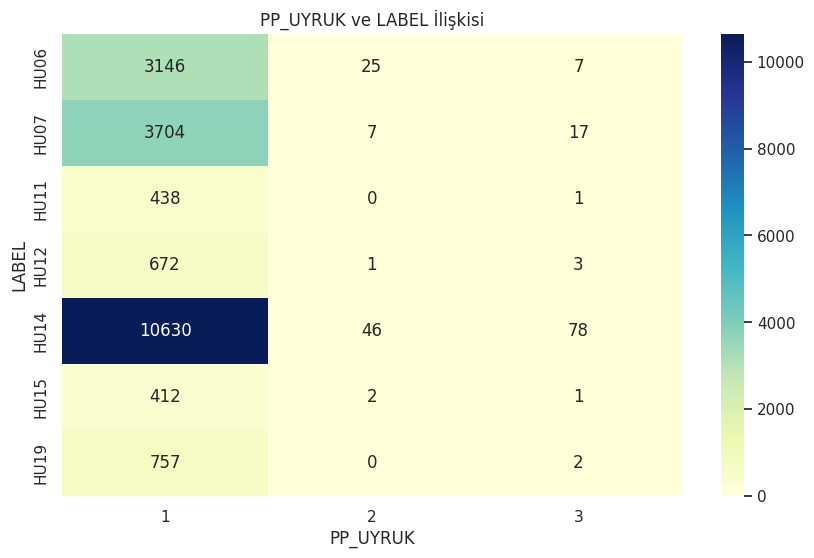

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# segment_counts verisini kullanarak heatmap oluşturma
plt.figure(figsize=(10, 6))
sns.heatmap(segment_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title('PP_UYRUK ve LABEL İlişkisi')
plt.xlabel('PP_UYRUK')
plt.ylabel('LABEL')
plt.show()


In [22]:
train['PP_MESLEK'].nunique()

114

In [23]:
columns_to_check = [
    'SORU_YATIRIM_KARAKTERI_CVP',
    'SORU_YATIRIM_KARAKTERI_RG',
    'SORU_MEDENI_HAL_CVP',
    'SORU_MEDENI_HAL_RG',
    'SORU_EGITIM_CVP',
    'SORU_EGITIM_RG',
    'SORU_GELIR_CVP',
    'SORU_GELIR_RG',
    'SORU_COCUK_SAYISI_CVP',
    'SORU_COCUK_SAYISI_RG',
    'BES_AYRILMA_TALEP_ADET',
    'ODEMEME_TALEP_ADET',
    'HAYAT_AYRILMA_TALEP_ADET',
    'BILGI_TALEP_ADET',
    'VADE_TUTAR_0',
    'VADE_TUTAR_1',
    'VADE_TUTAR_2',
    'VADE_TUTAR_3',
    'VADE_TUTAR_4',
    'VADE_TUTAR_5',
    'VADE_TUTAR_6',
    'VADE_TUTAR_7',
    'VADE_TUTAR_8',
    'VADE_TUTAR_9',
    'VADE_TUTAR_10',
    'VADE_TUTAR_11',
    'ODEME_TUTAR_0',
    'ODEME_TUTAR_1',
    'ODEME_TUTAR_2',
    'ODEME_TUTAR_3',
    'ODEME_TUTAR_4',
    'ODEME_TUTAR_5',
    'ODEME_TUTAR_6',
    'ODEME_TUTAR_7',
    'ODEME_TUTAR_8',
    'ODEME_TUTAR_9',
    'ODEME_TUTAR_10',
    'ODEME_TUTAR_11',
    'SON_AY_KATKI_MIKTARI',
    'SON_AY_KATKI_ADET',
    'SON_CEYREK_KATKI_MIKTARI',
    'SON_CEYREK_KATKI_ADET',
    'SON_SENE_KATKI_MIKTARI',
    'SON_SENE_KATKI_ADET',
    'ANAPARA',
    'GETIRI'
]

for column in columns_to_check:
    null_count = train[column].isnull().sum()
    print(f"{column}: {null_count} null değer")


SORU_YATIRIM_KARAKTERI_CVP: 720021 null değer
SORU_YATIRIM_KARAKTERI_RG: 720021 null değer
SORU_MEDENI_HAL_CVP: 1780 null değer
SORU_MEDENI_HAL_RG: 1780 null değer
SORU_EGITIM_CVP: 127095 null değer
SORU_EGITIM_RG: 127095 null değer
SORU_GELIR_CVP: 277902 null değer
SORU_GELIR_RG: 277902 null değer
SORU_COCUK_SAYISI_CVP: 416560 null değer
SORU_COCUK_SAYISI_RG: 416560 null değer
BES_AYRILMA_TALEP_ADET: 0 null değer
ODEMEME_TALEP_ADET: 0 null değer
HAYAT_AYRILMA_TALEP_ADET: 0 null değer
BILGI_TALEP_ADET: 0 null değer
VADE_TUTAR_0: 0 null değer
VADE_TUTAR_1: 0 null değer
VADE_TUTAR_2: 0 null değer
VADE_TUTAR_3: 0 null değer
VADE_TUTAR_4: 0 null değer
VADE_TUTAR_5: 0 null değer
VADE_TUTAR_6: 0 null değer
VADE_TUTAR_7: 0 null değer
VADE_TUTAR_8: 0 null değer
VADE_TUTAR_9: 0 null değer
VADE_TUTAR_10: 0 null değer
VADE_TUTAR_11: 0 null değer
ODEME_TUTAR_0: 0 null değer
ODEME_TUTAR_1: 0 null değer
ODEME_TUTAR_2: 0 null değer
ODEME_TUTAR_3: 0 null değer
ODEME_TUTAR_4: 0 null değer
ODEME_TUTAR_5

In [24]:
segment_counts = train.groupby(['LABEL', 'SORU_MEDENI_HAL_CVP']).size().unstack(fill_value=0)
print(segment_counts)

SORU_MEDENI_HAL_CVP  Divorced  Marriage Annulled  Marriage Cancelled  Married  \
LABEL                                                                           
HU06                      218                  0                   0     1824   
HU07                      323                  0                   0     2299   
HU11                       19                  0                   0      354   
HU12                       39                  0                   0      517   
HU14                      481                  0                   0     6587   
HU15                       13                  0                   0      248   
HU19                       35                  0                   0      512   
UA                      24218                  2                   6   464072   

SORU_MEDENI_HAL_CVP  Other  Single  Widowed  
LABEL                                        
HU06                     0    1102       34  
HU07                     0    1067       37  
HU11 

In [25]:
# Belirli bir segmentin belirli bir sütun değerinin yüzdesini hesaplamak için bir fonksiyon
def calculate_percentage(segment_counts, label, column_value):
    total_count = segment_counts.loc[label].sum()  # Belirli bir label (örneğin 'DIVORCED') için toplam sayıyı bul
    column_count = segment_counts.loc[label, column_value]  # Belirli bir label ve sütun değeri için sayıyı bul
    percentage = (column_count / total_count) * 100  # Oranı hesapla
    return percentage

# Yüzdelik değerleri hesaplayarak ekrana yazdırma
for label in segment_counts.index:
    for column_value in segment_counts.columns:
        percentage = calculate_percentage(segment_counts, label, column_value)
        print(f"{label} için {column_value} yüzdesi: {percentage}%")


HU06 için Divorced yüzdesi: 6.8596601636249215%
HU06 için Marriage Annulled yüzdesi: 0.0%
HU06 için Marriage Cancelled yüzdesi: 0.0%
HU06 için Married yüzdesi: 57.394587791063564%
HU06 için Other yüzdesi: 0.0%
HU06 için Single yüzdesi: 34.67589679043424%
HU06 için Widowed yüzdesi: 1.0698552548772813%
HU07 için Divorced yüzdesi: 8.668813741277509%
HU07 için Marriage Annulled yüzdesi: 0.0%
HU07 için Marriage Cancelled yüzdesi: 0.0%
HU07 için Married yüzdesi: 61.701556629092856%
HU07 için Other yüzdesi: 0.0%
HU07 için Single yüzdesi: 28.63660762211487%
HU07 için Widowed yüzdesi: 0.9930220075147612%
HU11 için Divorced yüzdesi: 4.328018223234624%
HU11 için Marriage Annulled yüzdesi: 0.0%
HU11 için Marriage Cancelled yüzdesi: 0.0%
HU11 için Married yüzdesi: 80.6378132118451%
HU11 için Other yüzdesi: 0.0%
HU11 için Single yüzdesi: 14.80637813211845%
HU11 için Widowed yüzdesi: 0.22779043280182232%
HU12 için Divorced yüzdesi: 5.777777777777778%
HU12 için Marriage Annulled yüzdesi: 0.0%
HU12 içi

In [26]:
# Belirli bir etiket grubundaki örnekler içinde belirli bir sütun değerinin yüzdesini hesaplamak için bir fonksiyon
def calculate_percentage_within_label(train, label, column):
    # Belirli bir etiket (label) içindeki örnekler üzerinden filtreleme yap
    label_group = train[train['LABEL'] == label]
    
    # Belirli bir sütun (column) değeri için sadece belirli etiket grubundaki örneklerin sayısını bul
    column_count = label_group[column].sum()
    
    # Belirli bir etiket (label) içindeki toplam örnek sayısını bul
    total_count = label_group.shape[0]
    
    # Yüzdeyi hesapla
    percentage = (column_count / total_count) * 100
    
    return percentage

# Etiketler ve sütunlar arasındaki yüzdeleri hesapla ve ekrana yazdır
for label in train['LABEL'].unique():
    for column in train.columns:
        if column.startswith('HU'):
            percentage = calculate_percentage_within_label(train, label, column)
            print(f"{label} içindeki {column} yüzdesi: {percentage}%")


UA içindeki HU01 yüzdesi: 0.029900212543679527%
UA içindeki HU02 yüzdesi: 0.0016811364482390097%
UA içindeki HU03 yüzdesi: 0.07589130252050387%
UA içindeki HU04 yüzdesi: 1.0838526844146643%
UA içindeki HU05 yüzdesi: 0.8556984521536559%
UA içindeki HU06 yüzdesi: 1.5346374148924673%
UA içindeki HU07 yüzdesi: 0.6510801301679936%
UA içindeki HU10 yüzdesi: 0.5044610156465771%
UA içindeki HU11 yüzdesi: 0.19861426324195153%
UA içindeki HU12 yüzdesi: 0.08129495538984353%
UA içindeki HU13 yüzdesi: 0.008405682241195048%
UA içindeki HU14 yüzdesi: 1.8276354815855518%
UA içindeki HU15 yüzdesi: 0.04070751828235888%
UA içindeki HU16 yüzdesi: 0.037825570085377715%
UA içindeki HU17 yüzdesi: 1.0474680884277772%
UA içindeki HU18 yüzdesi: 1.9269426132065275%
UA içindeki HU19 yüzdesi: 0.6370306327077104%
HU19 içindeki HU01 yüzdesi: 0.0%
HU19 içindeki HU02 yüzdesi: 0.0%
HU19 içindeki HU03 yüzdesi: 0.0%
HU19 içindeki HU04 yüzdesi: 2.2397891963109355%
HU19 içindeki HU05 yüzdesi: 0.7905138339920948%
HU19 içind

# New train data with choosed columns.

In [27]:
train2 = train[['MUSTERI_ID', 'LABEL', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK', 'PP_MUSTERI_SEGMENTI', 'PP_UYRUK',
                'SORU_MEDENI_HAL_CVP', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET','HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET' ,'VADE_TUTAR_0', 'VADE_TUTAR_1', 'VADE_TUTAR_2', 'VADE_TUTAR_3',
                'VADE_TUTAR_4', 'VADE_TUTAR_5', 'VADE_TUTAR_6', 'VADE_TUTAR_7', 'VADE_TUTAR_8', 'VADE_TUTAR_9',
                'VADE_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_0', 'ODEME_TUTAR_1', 'ODEME_TUTAR_2', 'ODEME_TUTAR_3',
                'ODEME_TUTAR_4', 'ODEME_TUTAR_5', 'ODEME_TUTAR_6', 'ODEME_TUTAR_7', 'ODEME_TUTAR_8', 'ODEME_TUTAR_9',
                'ODEME_TUTAR_10', 'ODEME_TUTAR_11', 'ANAPARA', 'GETIRI', 'BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06',
                'BU07', 'BU08', 'BU09', 'BU10', 'BU11', 'BU12', 'BU13', 'BU14', 'BU15', 'BU16', 'BU17', 'BU18', 'BU19',
                'BU20', 'BU21', 'BU22', 'BU23', 'BU24', 'HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07', 'HU10',
                'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU17', 'HU18', 'HU19', 'AKTIF_ILK_POLICE_RG']]

In [28]:
train2.shape
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852719 entries, 0 to 852718
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   MUSTERI_ID                852719 non-null  object
 1   LABEL                     852719 non-null  object
 2   PP_CINSIYET               852719 non-null  int64 
 3   PP_YAS                    852719 non-null  int64 
 4   PP_MESLEK                 764099 non-null  object
 5   PP_MUSTERI_SEGMENTI       852719 non-null  int64 
 6   PP_UYRUK                  852719 non-null  int64 
 7   SORU_MEDENI_HAL_CVP       850939 non-null  object
 8   BES_AYRILMA_TALEP_ADET    852719 non-null  int64 
 9   ODEMEME_TALEP_ADET        852719 non-null  int64 
 10  HAYAT_AYRILMA_TALEP_ADET  852719 non-null  int64 
 11  BILGI_TALEP_ADET          852719 non-null  int64 
 12  VADE_TUTAR_0              852719 non-null  int64 
 13  VADE_TUTAR_1              852719 non-null  int64 
 14  VADE

In [29]:
train2['LABEL'].value_counts()

LABEL
UA      832770
HU14     10754
HU07      3728
HU06      3178
HU19       759
HU12       676
HU11       439
HU15       415
Name: count, dtype: int64

In [30]:
train2.head()

,MUSTERI_ID,LABEL,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,SORU_MEDENI_HAL_CVP,BES_AYRILMA_TALEP_ADET,ODEMEME_TALEP_ADET,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,UA,2,505,Öğretmen,105,1,Single,0,0,...,0,0,0,0,0,0,0,0,0,9
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,UA,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,Married,0,0,...,0,0,0,0,0,0,0,0,0,11
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,HU19,2,578,Muhasebe,104,1,Single,0,0,...,0,1,0,0,0,0,0,0,0,66
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,UA,2,648,Diğer,106,1,Married,0,0,...,0,0,0,0,0,0,0,0,0,111
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,UA,2,487,İşçi,103,1,Married,0,0,...,0,0,0,0,0,0,0,0,0,90


In [31]:
# "LABEL" sütunundaki kategorik değerleri sayısal değerlere dönüştürme
label_mapping = {'UA': 0, 'HU14': 1, 'HU07': 2, 'HU06': 3, 'HU19': 4, 'HU12': 5, 'HU11': 6, 'HU15': 7}
train2['LABEL'] = train2['LABEL'].map(label_mapping)

# "PP_MESLEK" sütunundaki kategorik değerleri sayısal değerlere dönüştürme
train2['PP_MESLEK'] = train2['PP_MESLEK'].astype('category').cat.codes

# "SORU_MEDENI_HAL_CVP" sütunundaki kategorik değerleri sayısal değerlere dönüştürme
marital_status_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4}
train2['SORU_MEDENI_HAL_CVP'] = train2['SORU_MEDENI_HAL_CVP'].map(marital_status_mapping)

# Veri kümesini kontrol et
print(train2.head())


                                          MUSTERI_ID  LABEL  PP_CINSIYET  \
0  61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...      0            2   
1  8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...      0            2   
2  6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...      4            2   
3  fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...      0            2   
4  aae8411e2c335e94922290314abe1fcc81044e8071e1c8...      0            2   

   PP_YAS  PP_MESLEK  PP_MUSTERI_SEGMENTI  PP_UYRUK  SORU_MEDENI_HAL_CVP  \
0     505        102                  105         1                  1.0   
1     889         27                  102         1                  2.0   
2     578         56                  104         1                  1.0   
3     648         21                  106         1                  2.0   
4     487        110                  103         1                  2.0   

   BES_AYRILMA_TALEP_ADET  ODEMEME_TALEP_ADET  ...  HU11  HU12  HU13  HU14  \
0       

In [32]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852719 entries, 0 to 852718
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MUSTERI_ID                852719 non-null  object 
 1   LABEL                     852719 non-null  int64  
 2   PP_CINSIYET               852719 non-null  int64  
 3   PP_YAS                    852719 non-null  int64  
 4   PP_MESLEK                 852719 non-null  int8   
 5   PP_MUSTERI_SEGMENTI       852719 non-null  int64  
 6   PP_UYRUK                  852719 non-null  int64  
 7   SORU_MEDENI_HAL_CVP       850917 non-null  float64
 8   BES_AYRILMA_TALEP_ADET    852719 non-null  int64  
 9   ODEMEME_TALEP_ADET        852719 non-null  int64  
 10  HAYAT_AYRILMA_TALEP_ADET  852719 non-null  int64  
 11  BILGI_TALEP_ADET          852719 non-null  int64  
 12  VADE_TUTAR_0              852719 non-null  int64  
 13  VADE_TUTAR_1              852719 non-null  i

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Özellikler ve hedef değişken
X = train2.drop(['MUSTERI_ID', 'LABEL'], axis=1)
y = train2['LABEL']

# Eğitim ve test verilerini bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitmek
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Modelin performansını değerlendirmek
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Eksik değerleri sütunların ortalaması ile doldur
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Modeli eğitmek
model = DecisionTreeClassifier()
model.fit(X_train_imputed, y_train)

# Modelin performansını değerlendirmek
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)


Doğruluk: 0.9580460174500423


In [35]:
X_train_imputed.shape
X_train_imputed

array([[  1., 488.,  18., ...,   1.,   0.,  45.],
       [  2., 140., 101., ...,   0.,   0.,   0.],
       [  2.,  34., 101., ...,   0.,   0.,  13.],
       ...,
       [  2., 652.,  -1., ...,   0.,   0., 179.],
       [  1., 403., 102., ...,   0.,   0.,  61.],
       [  2., 710.,  33., ...,   0.,   0.,  16.]])

In [36]:
X_test_imputed.shape

(170544, 78)

In [37]:
original = train2.columns.tolist()

In [40]:
originaltrain[2:]

NameError: name 'originaltrain' is not defined

In [41]:
# Dönüştürme
X_train_imputed2 = pd.DataFrame(X_train_imputed, columns=original[2:])  
X_test_imputed2 = pd.DataFrame(X_test_imputed, columns=original[2:])

# Ardından birleştirme
train3 = pd.concat([X_train_imputed2, X_test_imputed2], axis=0)
train3.shape

(852719, 78)

In [42]:
train_ids_labels = train2[['MUSTERI_ID', 'LABEL']]

In [43]:
train_ids_labels

,MUSTERI_ID,LABEL
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,0
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,0
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,4
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,0
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,0
...,...,...
852714,4a245f1a49af39319faa41668d6ee425fb71c7a75e8b22...,0
852715,2087a8e5f1f98d143011df1cccaa0331e3427b1a1e642e...,0
852716,8d4dccb1bd4763e909476935805d99b84e7f2098b646b7...,0
852717,e33a48c42db1da438d54da64cf59ef4acae4583bd4effc...,0


In [44]:
train_ids_labels.shape

(852719, 2)

In [45]:
train3 = pd.concat([train_ids_labels, train3], axis=0)

In [46]:
train3

,MUSTERI_ID,LABEL,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,SORU_MEDENI_HAL_CVP,BES_AYRILMA_TALEP_ADET,ODEMEME_TALEP_ADET,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170539,NaN,NaN,2.0,88.0,110.0,106.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
170540,NaN,NaN,1.0,21.0,101.0,106.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
170541,NaN,NaN,1.0,698.0,11.0,105.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
170542,NaN,NaN,2.0,90.0,101.0,106.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [47]:
# "PP_MESLEK" sütunundaki kategorik değerleri sayısal değerlere dönüştürme
test['PP_MESLEK'] = test['PP_MESLEK'].astype('category').cat.codes

# "SORU_MEDENI_HAL_CVP" sütunundaki kategorik değerleri sayısal değerlere dönüştürme
test['SORU_MEDENI_HAL_CVP'] = test['SORU_MEDENI_HAL_CVP'].map(marital_status_mapping)

# Veri kümesini kontrol et
print(test.head())


                                          MUSTERI_ID   FLAG  PP_CINSIYET  \
0  15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...  KASIM            2   
1  7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...  KASIM            1   
2  47498c1c6161aea484b0eed7997846919ca9287684aee4...  KASIM            1   
3  48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...  KASIM            2   
4  26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...  KASIM            1   

   PP_YAS  PP_MESLEK  PP_MUSTERI_SEGMENTI  PP_UYRUK    IL  \
0     467        102                  103         1   1.0   
1     658        102                  106         1  54.0   
2     634         77                  106         1  48.0   
3     638         -1                  106         1  67.0   
4      80        101                  106         1  34.0   

  SORU_YATIRIM_KARAKTERI_CVP  SORU_YATIRIM_KARAKTERI_RG  ...  HU11  HU12 HU13  \
0                        NaN                        NaN  ...     0     0    0   
1             

In [48]:
test2 = test[['MUSTERI_ID', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK', 'PP_MUSTERI_SEGMENTI', 'PP_UYRUK',
                'SORU_MEDENI_HAL_CVP', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET','HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET' ,'VADE_TUTAR_0', 'VADE_TUTAR_1', 'VADE_TUTAR_2', 'VADE_TUTAR_3',
                'VADE_TUTAR_4', 'VADE_TUTAR_5', 'VADE_TUTAR_6', 'VADE_TUTAR_7', 'VADE_TUTAR_8', 'VADE_TUTAR_9',
                'VADE_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_0', 'ODEME_TUTAR_1', 'ODEME_TUTAR_2', 'ODEME_TUTAR_3',
                'ODEME_TUTAR_4', 'ODEME_TUTAR_5', 'ODEME_TUTAR_6', 'ODEME_TUTAR_7', 'ODEME_TUTAR_8', 'ODEME_TUTAR_9',
                'ODEME_TUTAR_10', 'ODEME_TUTAR_11', 'ANAPARA', 'GETIRI', 'BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06',
                'BU07', 'BU08', 'BU09', 'BU10', 'BU11', 'BU12', 'BU13', 'BU14', 'BU15', 'BU16', 'BU17', 'BU18', 'BU19',
                'BU20', 'BU21', 'BU22', 'BU23', 'BU24', 'HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07', 'HU10',
                'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU17', 'HU18', 'HU19', 'AKTIF_ILK_POLICE_RG']]

# Eksik değerleri sütunların ortalaması ile doldur
test_imputed = imputer.transform(test2.drop(['MUSTERI_ID'], axis=1))

In [49]:
train3

,MUSTERI_ID,LABEL,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,SORU_MEDENI_HAL_CVP,BES_AYRILMA_TALEP_ADET,ODEMEME_TALEP_ADET,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170539,NaN,NaN,2.0,88.0,110.0,106.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
170540,NaN,NaN,1.0,21.0,101.0,106.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
170541,NaN,NaN,1.0,698.0,11.0,105.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
170542,NaN,NaN,2.0,90.0,101.0,106.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [50]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852719 entries, 0 to 852718
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MUSTERI_ID                852719 non-null  object 
 1   LABEL                     852719 non-null  int64  
 2   PP_CINSIYET               852719 non-null  int64  
 3   PP_YAS                    852719 non-null  int64  
 4   PP_MESLEK                 852719 non-null  int8   
 5   PP_MUSTERI_SEGMENTI       852719 non-null  int64  
 6   PP_UYRUK                  852719 non-null  int64  
 7   SORU_MEDENI_HAL_CVP       850917 non-null  float64
 8   BES_AYRILMA_TALEP_ADET    852719 non-null  int64  
 9   ODEMEME_TALEP_ADET        852719 non-null  int64  
 10  HAYAT_AYRILMA_TALEP_ADET  852719 non-null  int64  
 11  BILGI_TALEP_ADET          852719 non-null  int64  
 12  VADE_TUTAR_0              852719 non-null  int64  
 13  VADE_TUTAR_1              852719 non-null  i

In [51]:
train2.applymap(lambda x: x == 'NaN').any().value_counts()

False    80
Name: count, dtype: int64

# XGB with Metric Score

In [52]:
from typing import Dict

def determine_coeffs(df: pd.DataFrame) -> Dict[str, float]:
    label_counts = df['LABEL'].value_counts()
    inverse_freq: Dict[str, float] = {k: 1 / v for k, v in label_counts.items()}
    normalized_coeffs: Dict[str, float] = {k: v / sum(inverse_freq.values()) for k, v in inverse_freq.items()}
    return normalized_coeffs

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from typing import Dict
import numpy as np

# determine_coeffs fonksiyonu
def determine_coeffs(df: pd.DataFrame) -> Dict[str, float]:
    label_counts = df['LABEL'].value_counts()
    inverse_freq: Dict[str, float] = {k: 1 / v for k, v in label_counts.items()}
    normalized_coeffs: Dict[str, float] = {k: v / sum(inverse_freq.values()) for k, v in inverse_freq.items()}
    return normalized_coeffs

# Özellikler ve hedef değişken
X = train2.drop(['MUSTERI_ID', 'LABEL'], axis=1)
y = train2['LABEL']

# Eğitim ve test verilerini bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# En iyi parametrelerle XGBoost modelini tanımlamak ve eğitmek
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 250}
model = XGBClassifier(random_state=42, **best_params)
model.fit(X_train, y_train)

# Test verisiyle tahmin yapmak
y_pred = model.predict(X_test)

# Normalized coefficients hesaplamak
coeffs = determine_coeffs(pd.concat([X_test, y_test], axis=1))

# Her sınıf için F1 skoru hesaplamak ve katsayılarla çarpmak
unique_labels = np.unique(y_test)
weighted_f1_scores = [f1_score(y_test, y_pred, labels=[label], average=None) * coeffs[label] for label in unique_labels]

# Ağırlıklandırılmış F1 skorlarını toplayarak modelin metrik değerini hesaplamak
metric_score = sum(weighted_f1_scores)

print("Metric Score:", metric_score)


#XGB without Metric Score

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Özellikler ve hedef değişken
X = train2.drop(['MUSTERI_ID', 'LABEL'], axis=1)
y = train2['LABEL']

# Eğitim ve test verilerini bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# En iyi parametrelerle XGBoost modelini tanımlamak ve eğitmek
best_params = {'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 250}
model = XGBClassifier(random_state=42, **best_params)
model.fit(X_train, y_train)

# Test verisiyle tahmin yapmak
y_pred = model.predict(X_test)

# Modelin performansını değerlendirmek
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)


* 0.1 0.97816
* 0.3 0.978144
* 0.2 0.977964630828
* 0.3 new train without bp 0.978011

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter değerleri
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [5, 7],
    'min_child_weight': [1, 3],
}

# Grid Search modeli
grid_search = GridSearchCV(model, param_grid, cv=2, n_jobs=-1, scoring='accuracy', verbose=1)

# Grid Search modelini eğitmek
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluğu görüntülemek
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi parametrelerle doğruluk:", grid_search.best_score_)

# En iyi parametrelerle tahmin yapmak
best_model = XGBClassifier(**grid_search.best_params_)
y_pred = best_model.predict(X_test)

# En iyi parametrelerle test verisi doğruluğu
accuracy = accuracy_score(y_test, y_pred)
print("Test verisi doğruluk:", accuracy)

In [ ]:
param_grid = {
  'n_estimators': [100, 200],
  'learning_rate': [0.1, 0.01],
  'max_depth': [3, 5],
}

grid_search = GridSearchCV(model, param_grid, cv=2, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# En iyi parametreler ve doğruluk
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi parametrelerle doğruluk:", grid_search.best_score_)

# CATBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# determine_coeffs fonksiyonu yine kullanılabilir durumda.

# Özellikler ve hedef değişken
X = train2.drop(['MUSTERI_ID', 'LABEL'], axis=1)
y = train2['LABEL']

# Eğitim ve test verilerini bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CatBoost modelini tanımlamak ve eğitmek (parametresiz)
model2 = CatBoostClassifier(verbose=False, random_state=42)
model2.fit(X_train, y_train)

# Test verisiyle tahmin yapmak
y_pred = model2.predict(X_test)

# Normalized coefficients hesaplamak
coeffs = determine_coeffs(pd.concat([X_test, y_test], axis=1))

# Her sınıf için F1 skoru hesaplamak ve katsayılarla çarpmak
unique_labels = np.unique(y_test)
weighted_f1_scores = [f1_score(y_test, y_pred, labels=[label], average=None) * coeffs[label] for label in unique_labels]

# Ağırlıklandırılmış F1 skorlarını toplayarak modelin metrik değerini hesaplamak
metric_score = sum(weighted_f1_scores)

print("Metric Score:", metric_score)


# LGBM with Metric Score

In [88]:
# Önemli özelliklerin sıralamasını al
importance = best_model.feature_importances_
sorted_idx = np.argsort(importance)[::-1]  # Önemli özelliklerin sıralamasını büyükten küçüğe doğru al

# En önemli 50 özelliğin adlarını al

# Yeni bir eğitim veri seti oluşturun
newY = y_pred_imputed[important_features].copy()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [85]:
musteri_id_label = train2[['MUSTERI_ID', 'LABEL']]

# new_X_train ve musteri_id_label veri setlerini MUSTERI_ID sütununa göre birleştirin
new_X_train_with_labels = pd.concat([new_X_train, musteri_id_label], axis=1)

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# determine_coeffs fonksiyonu yukarıdaki örnekte verildiği gibi.

# Özellikler ve hedef değişken
X = new_X_train_with_labels.drop(['MUSTERI_ID', 'LABEL'], axis=1)
y = new_X_train_with_labels['LABEL']

# Eğitim ve test verilerini bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LightGBM modelini tanımlamak ve eğitmek (parametresiz)
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Test verisiyle tahmin yapmak
y_pred = model.predict(X_test)

# Normalized coefficients hesaplamak
coeffs = determine_coeffs(pd.concat([X_test, y_test], axis=1))

# Her sınıf için F1 skoru hesaplamak ve katsayılarla çarpmak
unique_labels = np.unique(y_test)
weighted_f1_scores = [f1_score(y_test, y_pred, labels=[label], average=None) * coeffs[label] for label in unique_labels]

# Ağırlıklandırılmış F1 skorlarını toplayarak modelin metrik değerini hesaplamak
metric_score = sum(weighted_f1_scores)

print("Metric Score:", metric_score)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.263451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7383
[LightGBM] [Info] Number of data points in the train set: 596903, number of used features: 50
[LightGBM] [Info] Start training from score -0.023617
[LightGBM] [Info] Start training from score -4.381127
[LightGBM] [Info] Start training from score -5.442416
[LightGBM] [Info] Start training from score -5.568896
[LightGBM] [Info] Start training from score -7.026633
[LightGBM] [Info] Start training from score -7.144652
[LightGBM] [Info] Start training from score -7.582482
[LightGBM] [Info] Start training from score -7.602416
Metric Score: [0.01937031]


LGBM with metric & randomized hyperparameters

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, make_scorer
from typing import Dict

# Belirtilen fonksiyon
def determine_coeffs(df: pd.DataFrame) -> Dict[str, float]:
    label_counts = df['LABEL'].value_counts()
    inverse_freq: Dict[str, float] = {k: 1 / v for k, v in label_counts.items()}
    normalized_coeffs: Dict[str, float] = {k: v / sum(inverse_freq.values()) for k, v in inverse_freq.items()}
    return normalized_coeffs

# Özel skorlama fonksiyonu
def custom_score_func(y_true, y_pred):
    # Tahminler ve gerçek değerler için bir DataFrame oluştur
    df = pd.DataFrame({'LABEL': y_true})
    df['PREDICTION'] = y_pred
    
    # Normalized coefficients hesapla
    coeffs = determine_coeffs(df[['LABEL']])
    
    # Her bir benzersiz etiket için ağırlıklandırılmış F1 skoru hesapla
    unique_labels = np.unique(y_true)
    weighted_f1_scores = np.array([f1_score(y_true, y_pred, labels=[label], average='macro') * coeffs.get(label, 0) for label in unique_labels])
    
    # Ağırlıklandırılmış F1 skorlarının toplamını döndür
    metric_score = np.sum(weighted_f1_scores)
    return metric_score

# Scikit-learn'de kullanmak üzere özel skorer oluştur
custom_scorer = make_scorer(custom_score_func, greater_is_better=True)

# Veri setinizin yüklenmesi ve hazırlanması
# Bu örnekte, 'train2' DataFrame'iniz zaten var ve kullanıma hazır varsayılmaktadır.

# Özellikler ve hedef değişken
# X ve y'nin tanımlanması burada doğrudan yapılıyor. Örneğinize uygun şekilde ayarlayın.
X = train2.drop(['MUSTERI_ID', 'LABEL'], axis=1)
y = train2['LABEL']

# Eğitim ve test verilerini bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter gridini tanımlayın
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    # Diğer parametreler buraya eklenebilir
}

# RandomizedSearchCV'yi kullanarak hyperparameter tuning yapın
random_search = RandomizedSearchCV(LGBMClassifier(random_state=42), param_distributions=param_grid, n_iter=10, scoring=custom_scorer, cv=2, random_state=42, verbose=2)

# Eğitim verileri üzerinde arama yapın
random_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru yazdırın
print("En iyi parametreler:", random_search.best_params_)
print("En iyi skor:", random_search.best_score_)

# En iyi modeli kullanarak test verisi üzerinde tahmin yapma ve özel metrik skoru hesaplama
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
# Custom scoring function'u doğrudan kullanarak final skoru hesapla
final_score = custom_score_func(y_test, y_pred)
print("Final Metric Score:", final_score)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.138958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7468
[LightGBM] [Info] Number of data points in the train set: 298451, number of used features: 75
[LightGBM] [Info] Start training from score -0.023802
[LightGBM] [Info] Start training from score -4.360714
[LightGBM] [Info] Start training from score -5.427053
[LightGBM] [Info] Start training from score -5.611511
[LightGBM] [Info] Start training from score -7.011650
[LightGBM] [Info] Start training from score -7.138301
[LightGBM] [Info] Start training from score -7.602415
[LightGBM] [Info] Start training from score -7.589081
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time= 1.2min
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from typing import Dict

# Öncelikle, determine_coeffs fonksiyonunuzu tanımlayın
def determine_coeffs(df: pd.DataFrame) -> Dict[str, float]:
    label_counts = df['LABEL'].value_counts()
    inverse_freq: Dict[str, float] = {k: 1 / v for k, v in label_counts.items()}
    normalized_coeffs: Dict[str, float] = {k: v / sum(inverse_freq.values()) for k, v in inverse_freq.items()}
    return normalized_coeffs

# Custom metric fonksiyonu
def custom_metric(y_true, y_pred):
    df = pd.DataFrame({'LABEL': y_true, 'PREDICTION': y_pred})
    
    # Normalized coefficients hesapla
    coeffs = determine_coeffs(df[['LABEL']])
    
    # Her bir benzersiz etiket için ağırlıklandırılmış F1 skoru hesapla
    unique_labels = np.unique(y_true)
    weighted_f1_scores = np.array([f1_score(y_true, y_pred, labels=[label], average='macro') * coeffs.get(label, 0) for label in unique_labels])
    
    # Ağırlıklandırılmış F1 skorlarının toplamını döndür
    metric_score = np.sum(weighted_f1_scores)
    return metric_score

# Veri setinizi yükleyin ve hazırlayın (örnek olarak 'train2' kullanılıyor)
# X = train2.drop(['MUSTERI_ID', 'LABEL'], axis=1)
# y = train2['LABEL']
# Bu adımı, kendi veri setinizin yüklendiği ve 'train2' olarak adlandırıldığı varsayımıyla atlıyorum.

# Veriyi bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP modelini tanımlayın
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant', max_iter=200, random_state=42)

# Modeli eğitin
mlp_model.fit(X_train_scaled, y_train)

# Test verisi üzerinde tahmin yapın
y_pred = mlp_model.predict(X_test_scaled)

# Accuracy skorunu hesaplayın (isteğe bağlı)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Custom metric skorunu hesaplayın
final_metric_score = custom_metric(y_test, y_pred)
print("Final Metric Score:", final_metric_score)


ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [81]:
y_pred_imputed = model.predict(test_imputed)

ValueError: Number of features of the model must match the input. Model n_features_ is 50 and input n_features is 78

In [69]:
# Tahmin edilen LABEL'ları tersine çevirerek uygun etiketlere dönüştürmek
predicted_labels_reversed2 = [next(key for key, value in label_mapping.items() if value == pred) for pred in y_pred_imputed]

# Tahmin edilen LABEL'ları test veri çerçevesine eklemek
test['LABEL'] = predicted_labels_reversed2

# LABEL sütunundaki değerlerin sayısını kontrol etmek
print(test['LABEL'].value_counts())


LABEL
UA      194862
HU14       638
HU06        35
HU07        31
HU15        28
HU19        19
HU11        16
HU12         2
Name: count, dtype: int64


* XGBC1
* LABEL
* UA      194226
* HU14      1096
* HU07       187
* HU06        65
* HU19        21
* HU11        16
* HU15        15
* HU12         5
* Name: count, dtype: int64
* 2
* LABEL
* UA      194543
* HU14       804
* HU07       220
* HU06        47
* HU15        14
* HU19         1
* HU12         1
* HU11         1
* Name: count, dtype: int64
* 3
* LABEL
* UA      194414
* HU14       927
* HU07       213
* HU06        51
* HU15        19
* HU11         5
* HU12         1
* HU19         1
* Name: count, dtype: int64
* LABEL 4
* UA      194745
* HU14       675
* HU07       153
* HU06        38
* HU15        19
* HU12         1
* Name: count, dtype: int64


In [70]:
test['LABEL'].value_counts()

LABEL
UA      194862
HU14       638
HU06        35
HU07        31
HU15        28
HU19        19
HU11        16
HU12         2
Name: count, dtype: int64

In [71]:
test[['MUSTERI_ID', 'LABEL']].to_csv('test_predictions9.csv', index=False)